# Data Generation

## Generation

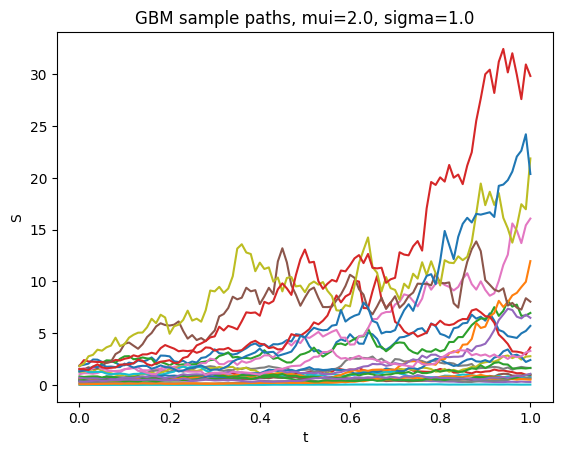

In [112]:
# dxt = myui x_t dt + sigma x_t dW_t;

import numpy as np
import matplotlib.pyplot as plt
import os

samples_to_visualise = 25
drift_coefficient = 2.0                         # myui
volatility_cofficient = 1.0                     # sigma

mu = drift_coefficient
sigma = volatility_cofficient

runs = 10_000                                    # number of data samples: change to 10000 later
n = 100                                         # number of steps per time
t = 1                                           # time
nt = n*t                                        # total steps

r = np.random.randn(nt, runs)
dW = r * np.sqrt(t/n)
W = np.zeros((nt + 1, runs))
W[1:, :] = np.cumsum(dW, axis=0)

t_grid = np.linspace(0.0, t, nt + 1)[:, None]

S0 = np.random.uniform(0.0, 2.0, size=(1, runs))
S = S0*np.exp(sigma*W + (mu - (1/2) * sigma**2)*t_grid)

plt.plot(t_grid, S[:, :samples_to_visualise])
plt.xlabel("t")
plt.ylabel("S")
plt.title(f"GBM sample paths, mui={mu}, sigma={sigma}")
plt.show()

## Saving the data

## training data generation

In [113]:
L = 40
n_rec = L

inputs_train = np.zeros((runs, 1))
outputs_train = np.zeros((runs, L))
full_train = np.zeros((runs, L+1))

# S has size 101, 10000 => nt+1, runs
for run in range(runs):
    start = np.random.randint(0, nt + 1 - L) # 0 to 101-L
    inputs_train[run, 0] = S[start, run]
    outputs_train[run, :] = S[start + 1: start + 1 + L, run]
    full_train[run, :] = S[start : start + 1 + L, run]

save_path = "./../Data"
os.makedirs(save_path, exist_ok=True)

np.savez(
    f"{save_path}/training_data.npz",
    inputs_train=inputs_train,
    outputs_train=outputs_train,
    full_train=full_train,
    S_full = S,
    t_grid_all = t_grid
)



# Data Stats Visualization

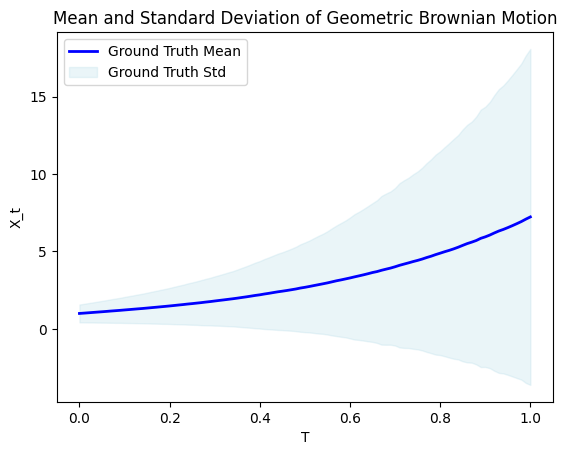

In [114]:
true_mean = S.mean(axis=1)
true_std  = S.std(axis=1)

plt.plot(t_grid, true_mean, color="blue", label="Ground Truth Mean", linewidth=2)
plt.fill_between(t_grid[:, 0], true_mean - true_std, true_mean + true_std, alpha=0.25, color="lightblue", label="Ground Truth Std")

plt.xlabel("T")
plt.ylabel("X_t")
plt.title("Mean and Standard Deviation of Geometric Brownian Motion")
plt.legend()
plt.grid(False)
plt.show()